In [1]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

/home/eliska/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/eliska/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 2D Hilbertova křivka 

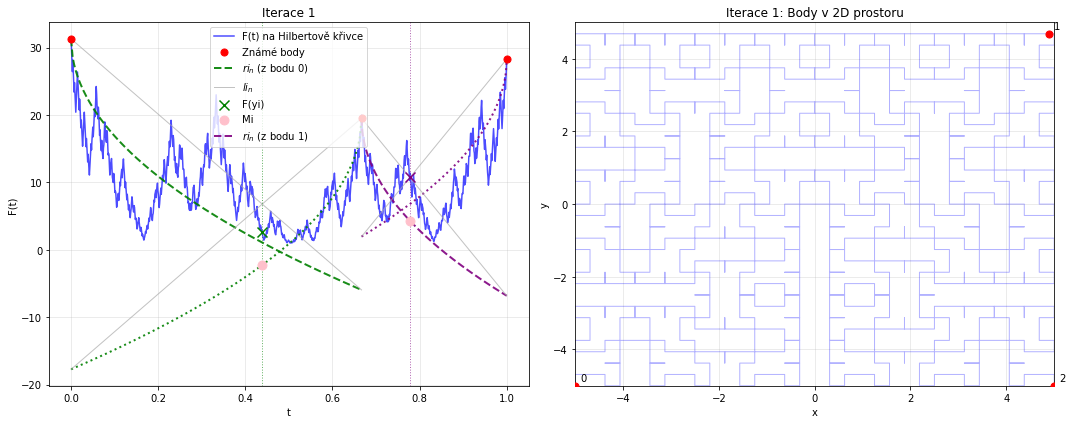

In [2]:
hilbert = Hilbert2D(15)
# Vykreslí paraboloidy v první iteraci (iteration_to_plot=0)
hilbert.plot_holder_paraboloids(H=100, r=3, eps=1e-4, max_iter=10, 
                                n=5, x_min=-5, x_max=5, y_min=-5, y_max=5, 
                                whatFunc=0, iteration_to_plot=1)

## Test mezivýpočtů pro výpočet bodu křivky 

In [3]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [4]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


##  Hledání minima za využití algoritmu z knihovny scipy.optimize

In [5]:
print("Opravdové minimum f = 1.0")
for n in [2,3,4,5,6,7,8,25]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,0,1,0,1,0)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 1.0
precision=  2  =>  t = 0.387500,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  3  =>  t = 0.375001,  h(t) = (0.2500, 0.7500),  f = 1.002501
precision=  4  =>  t = 0.378125,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  5  =>  t = 0.377539,  h(t) = (0.3000, 0.7812),  f = 1.003301
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7813),  f = 1.003480
precision=  7  =>  t = 0.378661,  h(t) = (0.2968, 0.7500),  f = 1.001255
precision=  8  =>  t = 0.382246,  h(t) = (0.3286, 0.7852),  f = 1.004034
precision= 25  =>  t = 0.378922,  h(t) = (0.3125, 0.7539),  f = 1.001531


In [6]:

print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8,10,11,12,13]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-5,5,-5,5,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.633790,  h(t) = (2.8516, 2.5000),  f = 4.552424
precision=  3  =>  t = 0.382803,  h(t) = (-2.5000, 3.1242),  f = 2.711152
precision=  4  =>  t = 0.367132,  h(t) = (-3.1250, 3.1339),  f = 3.700411
precision=  5  =>  t = 0.361333,  h(t) = (-2.8141, 3.4375),  f = 4.136436
precision=  6  =>  t = 0.361573,  h(t) = (-2.8131, 3.2812),  f = 0.947096
precision=  7  =>  t = 0.361636,  h(t) = (-2.8164, 3.2031),  f = 0.215062
precision=  8  =>  t = 0.361650,  h(t) = (-2.8154, 3.1641),  f = 0.046597
precision= 10  =>  t = 0.361653,  h(t) = (-2.8125, 3.1421),  f = 0.006380
precision= 11  =>  t = 0.361653,  h(t) = (-2.8125, 3.1398),  f = 0.004590
precision= 12  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368
precision= 13  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368


In [7]:
print("Opravdové minimum f = 0.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-10,10,-10,10,2)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 0.0
precision=  2  =>  t = 0.620192,  h(t) = (4.6154, 5.0000),  f = 0.961538
precision=  3  =>  t = 0.625000,  h(t) = (5.0000, 5.0001),  f = 1.000011
precision=  4  =>  t = 0.531251,  h(t) = (2.5003, 2.5000),  f = 0.250027
precision=  5  =>  t = 0.530950,  h(t) = (2.5000, 2.3077),  f = 0.240385
precision=  6  =>  t = 0.531249,  h(t) = (2.5011, 2.5000),  f = 0.250109
precision=  7  =>  t = 0.531190,  h(t) = (2.5000, 2.3455),  f = 0.240756
precision=  8  =>  t = 0.557208,  h(t) = (0.2968, 2.5781),  f = 1.383801


## Hledání minima za pomoci Hoelderova algoritmu

## Pro vlastní funkci


    Iterace n  Rozdíl Hoelder  Rozdíl scipy
0           1    2.000000e-02      0.020000
1           2    1.250000e-03      0.001250
2           3    2.500642e-03      0.002501
3           4    7.812502e-05      0.001250
4           5    7.812503e-05      0.003301
5           6    2.564072e-04      0.003480
6           7    1.103874e-05      0.001255
7           8    3.788030e-07      0.004034
8           9    3.283634e-07      0.003553
9          10    1.080098e-05      0.001426
10         11    4.481271e-07      0.003451
11         12    6.869291e-07      0.003408
12         13    2.689317e-06      0.003491
13         14    3.926737e-07      0.003633
14         15    1.394521e-05      0.001320
15         16    1.318646e-06      0.001782
16         17    8.172255e-07      0.003514
17         18    1.619404e-07      0.003525
18         19    8.105144e-07      0.003523
19         20    2.768993e-05      0.003532
20         21    2.810491e-07      0.001272
21         22    1.487774e-06   

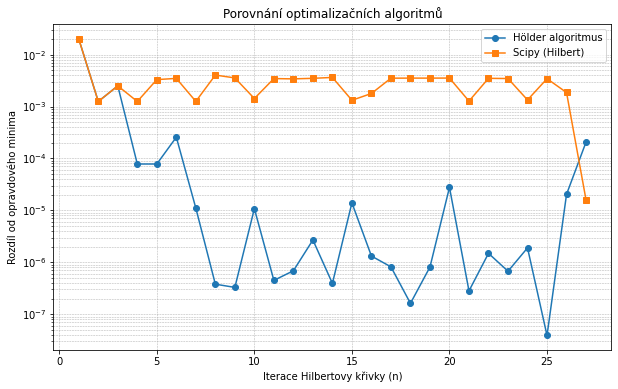

In [8]:
h2d = Hilbert2D(50)
I = 2
H = -2
r = 3
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, I, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0, 1.0)

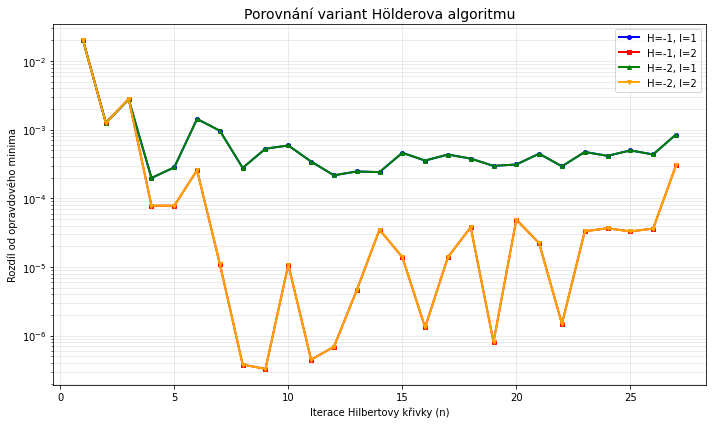

In [9]:
h2d.compare_holder_variants(r=3, eps=0.00000001, max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=0, x_max=1, y_min=0, y_max=1, whatFunc=0, true_min=1.0)

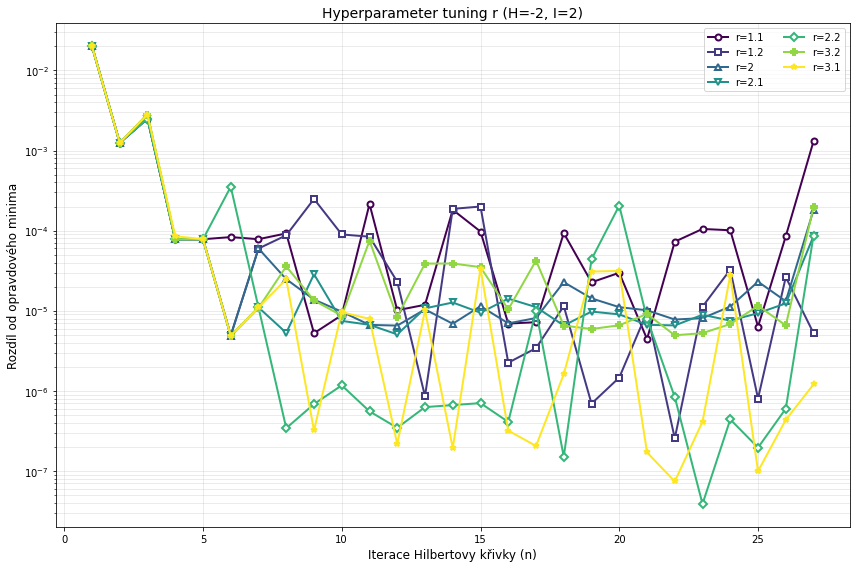

In [10]:
h2d.hyperparameter_tuning_r(r_values=[1.1, 1.2,2,2.1,2.2,3.2,3.1], H=-2, I=2, eps=0.00000001, max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=0, x_max=1, y_min=0, y_max=1, whatFunc=0, true_min=1.0)

Porovnání Holderovských konstant

In [11]:
analysis_df = h2d.analyze_holder_constants(10, I,-2,r, eps, max_iter, N_vals, 0, 1, 0, 1, 0)
print(analysis_df)
    

     n  H opravdové  H průměr  H finální
0    1           10  0.429831   0.412467
1    2           10  0.691665   0.687032
2    3           10  0.739567   0.709927
3    4           10  0.827897   0.837530
4    5           10  0.859099   0.891290
5    6           10  0.890599   1.047657
6    7           10  0.866790   0.893478
7    8           10  0.927020   0.962724
8    9           10  0.918915   0.960091
9   10           10  0.927824   0.986627
10  11           10  0.948662   1.154099
11  12           10  0.939255   1.156780
12  13           10  0.848227   0.943584
13  14           10  0.874989   0.888153
14  15           10  0.954095   0.993473
15  16           10  0.859016   0.900563
16  17           10  0.860380   0.914540
17  18           10  0.885294   0.908401
18  19           10  0.905182   1.117526
19  20           10  0.943618   1.126123
20  21           10  0.867948   0.882959
21  22           10  0.881932   0.969874
22  23           10  0.833990   0.961853
23  24          

## Pro Himmelblauovu funkci 

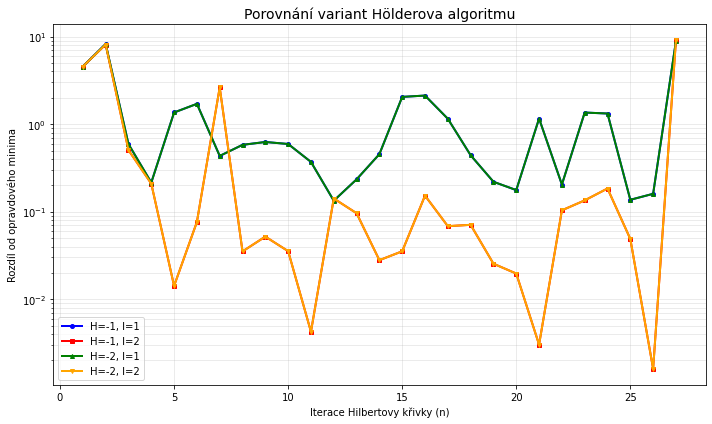

In [12]:
h2d.compare_holder_variants(r=2, eps=0.00000001, max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=0, x_max=5, y_min=0, y_max=5, whatFunc=1, true_min=0.0)

    Iterace n  Rozdíl Hoelder  Rozdíl scipy
0           1        4.552424      4.552424
1           2        8.125321     48.379374
2           3        0.505555     26.094973
3           4        0.209229     15.429842
4           5        0.014206     11.038041
5           6        0.069404     11.753985
6           7        0.014375     15.836548
7           8        0.035200     15.160258
8           9        0.051932      9.561742
9          10        0.029223      9.502386
10         11        0.004258     14.527145
11         12        0.141494     14.729056
12         13        0.096072     19.543401
13         14        0.000571     11.821105
14         15        0.035309     14.593139
15         16        0.152633      9.341161
16         17        0.023970     17.900154
17         18        0.030357     19.900053
18         19        0.025460     18.678664
19         20        0.019654     19.409434
20         21        0.003031     19.899811
21         22        0.103701   

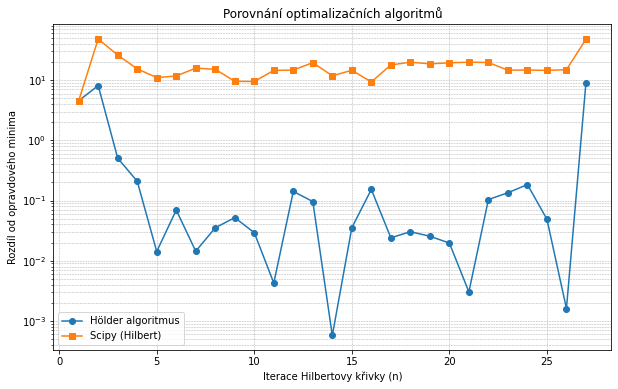

In [13]:
I=2
H = -2
r = 2
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, I,r, eps, max_iter,N_vals,0,5,0,5,1,0.0)

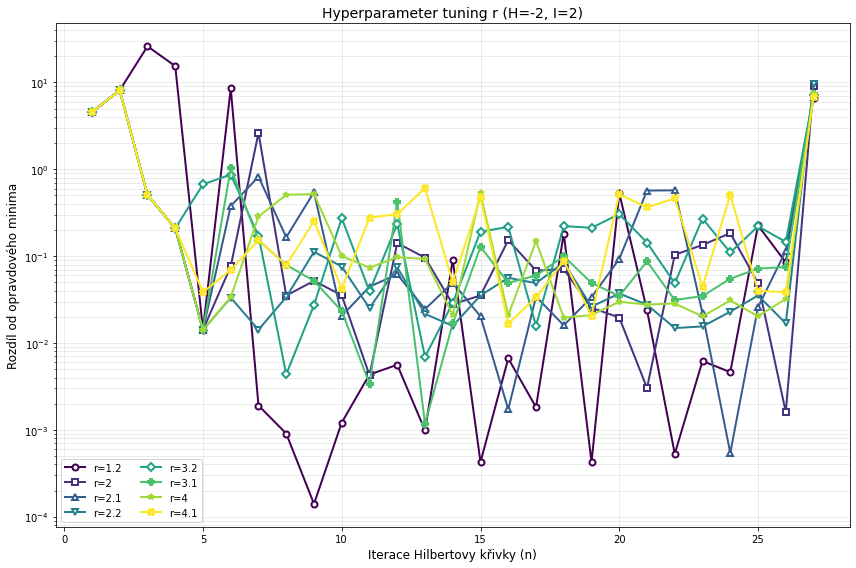

In [14]:
h2d.hyperparameter_tuning_r(r_values=[1.2,2,2.1,2.2,3.2,3.1,4,4.1],H=-2, I=2, eps=1e-5, max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=0, x_max=5, y_min=0, y_max=5, whatFunc=1, true_min=0.0)

In [15]:
analysis_df = h2d.analyze_holder_constants(500,2,-2, r, eps, max_iter,N_vals,-5,5,-5,5,1)
print(analysis_df)

     n  H opravdové     H průměr    H finální
0    1          500  1356.537018  1396.042586
1    2          500  1487.272362  1525.747303
2    3          500  2539.293071  2904.441647
3    4          500  2586.952784  3822.492951
4    5          500  2899.449369  3325.121966
5    6          500  2795.511685  3094.810183
6    7          500  2789.243936  2865.795567
7    8          500  2600.572708  3140.616854
8    9          500  2674.412532  2958.242291
9   10          500  2836.017637  3143.056184
10  11          500  2788.579817  3021.316431
11  12          500  2786.953102  3516.519470
12  13          500  2823.972834  3165.236858
13  14          500  2790.213361  2944.814161
14  15          500  2905.799006  3028.716014
15  16          500  2747.548603  3036.867328
16  17          500  2822.768953  3034.652280
17  18          500  2735.069131  3365.626054
18  19          500  2798.283223  3148.563753
19  20          500  2763.564784  2920.756745
20  21          500  2831.196048  

## Pro Matyasovu funkci

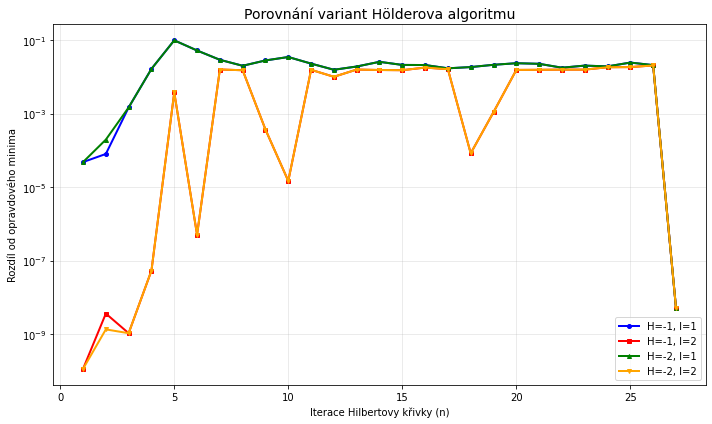

In [16]:
h2d.compare_holder_variants(r=3, eps=0.00000001, max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=-5, x_max=5, y_min=-5, y_max=5, whatFunc=2, true_min=0.0)

    Iterace n  Rozdíl Hoelder  Rozdíl scipy
0           1    1.153126e-10      0.000000
1           2    3.671111e-09      0.240385
2           3    1.075330e-09      0.250003
3           4    5.403624e-08      0.062507
4           5    3.756229e-03      0.060096
5           6    5.089978e-07      0.062527
6           7    1.355759e-06      0.060189
7           8    1.507179e-02      0.345950
8           9    3.681181e-04      0.061891
9          10    1.475575e-05      0.061022
10         11    1.036695e-04      0.070131
11         12    4.299111e-03      0.060193
12         13    3.842060e-04      0.064508
13         14    1.070258e-03      0.060652
14         15    1.162848e-05      0.248869
15         16    4.163038e-04      0.253885
16         17    1.253270e-03      0.061283
17         18    8.312413e-05      0.061468
18         19    1.093821e-03      0.061292
19         20    4.635842e-06      0.259403
20         21    2.278615e-05      0.066051
21         22    1.142038e-04   

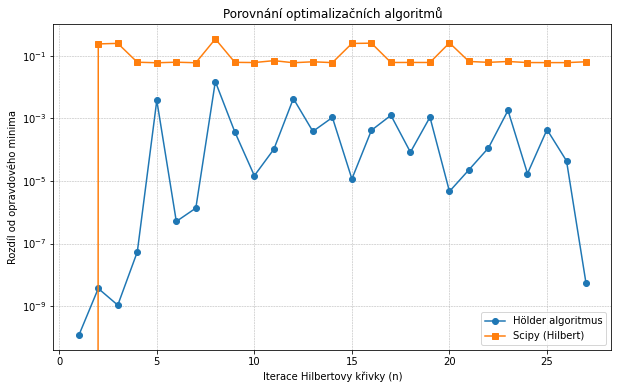

In [17]:
I=2
H = -1
r = 3
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, I,r, eps, max_iter,N_vals,-5,5,-5,5,2,0.0)

In [18]:
comparison_df = h2d.analyze_holder_constants(7.07,2,-2, r, eps, max_iter,N_vals,-5,5,-5,5,2)
print(comparison_df)

     n  H opravdové   H průměr  H finální
0    1         7.07  29.027840  26.924351
1    2         7.07  43.520977  41.416733
2    3         7.07  56.637154  61.454029
3    4         7.07  67.802865  72.472078
4    5         7.07  75.182634  73.017121
5    6         7.07  80.479304  83.572549
6    7         7.07  82.817972  85.577083
7    8         7.07  85.347634  88.262431
8    9         7.07  84.771954  86.226600
9   10         7.07  85.191093  84.640787
10  11         7.07  86.314879  86.928757
11  12         7.07  86.095765  86.126478
12  13         7.07  85.645429  86.563179
13  14         7.07  85.648271  87.185083
14  15         7.07  86.366229  87.191618
15  16         7.07  85.804705  86.390590
16  17         7.07  85.396361  86.506037
17  18         7.07  85.597730  85.965974
18  19         7.07  84.928424  86.515979
19  20         7.07  86.354119  87.787018
20  21         7.07  85.718785  86.595885
21  22         7.07  86.311423  87.189969
22  23         7.07  86.104026  87

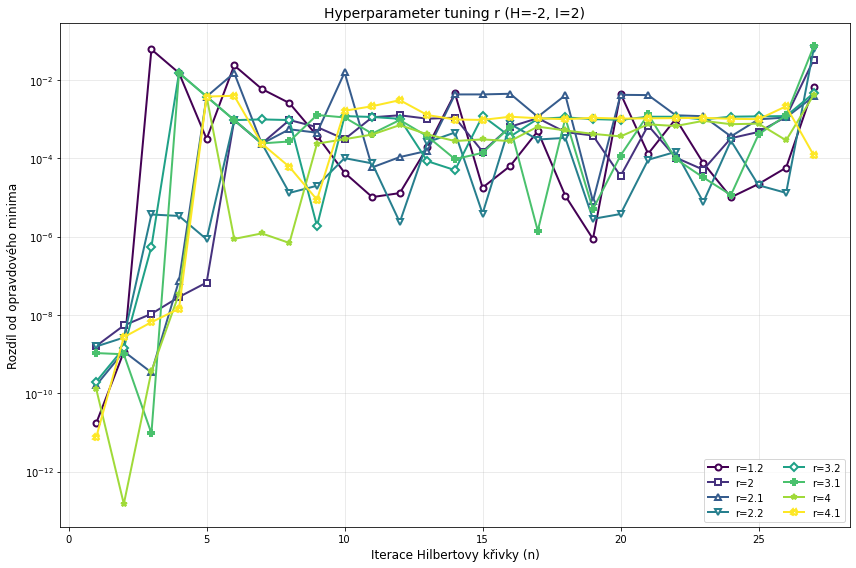

In [29]:
h2d.hyperparameter_tuning_r(r_values=[1.2,2,2.1,2.2,3.2,3.1,4,4.1],H=-2,I=2,eps=1e-5,max_iter=100, N_vals=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27], x_min=-5, x_max=5, y_min=-5, y_max=5, whatFunc=2, true_min=0.0)

## Vykreslení grafů Hilbertovy křivky

Bod na aproximačním polygonu: [0.2   0.375]


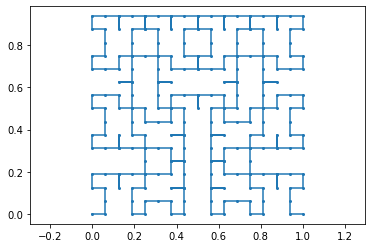

[1. 0.]


In [20]:
n = 4 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

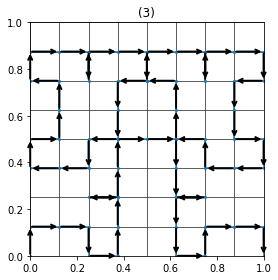

In [21]:
h2d.plot_multiple_hilberts_arrows([3])

## Vykreslení grafů pro Hilbertovu křivku s posunutím

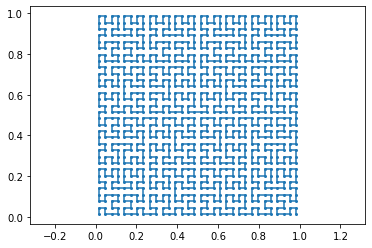

In [22]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


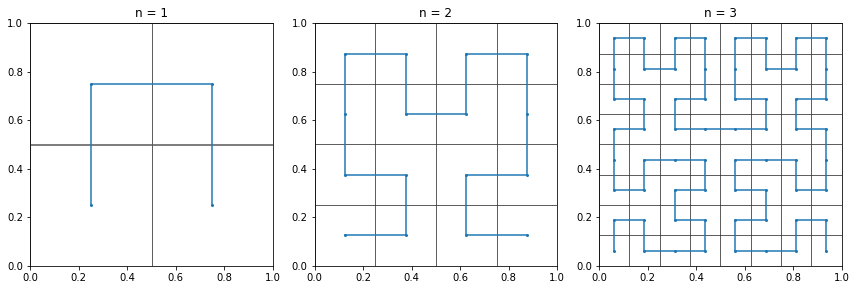

In [23]:
h2da.plot_multiple_hilberts([1, 2, 3])

# 3D Hilbertova křivka

## Test mezivýpočtů bodu křivky

In [24]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
3D result: [0.625 0.75  0.125]


## Hledání minima za pomoci algoritmu z knihovny scipy.optimize

In [25]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.237500,  h(t) = (0.5000, 0.7000, 0.0000),  f = 1.020000
precision=  3  =>  t = 0.236326,  h(t) = (0.3752, 0.7500, 0.0000),  f = 1.004074
precision=  4  =>  t = 0.236768,  h(t) = (0.3125, 0.7000, 0.0000),  f = 1.000078
precision=  5  =>  t = 0.236084,  h(t) = (0.3750, 0.6874, 0.0000),  f = 1.002891
precision=  6  =>  t = 0.236789,  h(t) = (0.2812, 0.7011, 0.0000),  f = 1.000176
precision=  7  =>  t = 0.237254,  h(t) = (0.3281, 0.6472, 0.0078),  f = 1.009602
precision=  8  =>  t = 0.237254,  h(t) = (0.3292, 0.6484, 0.0039),  f = 1.005662


## Hledání minima pomocí Hoelderovského algoritmu

In [26]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,13,15,16,17,18,20,21] 
max_iter = 250

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.2996653785872082, 0.5, 0.0)
  Hodnota f: 1.020000055985745
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.7002308730526581, 0.0)
  Hodnota f: 1.0450000266511832
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29881784943171397, 0.6875, 0.0)
  Hodnota f: 1.0000788237399831
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (0.21875, 0.6875, 0.011811472835120185)
  Hodnota f: 1.0151903790851202
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.373644506634718

## Vykreslení grafu pro 3D křivku

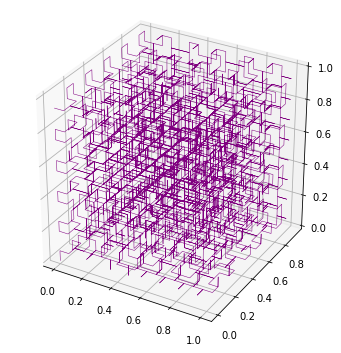

In [27]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_polygon(4)


## Graf posunuté 3D H. křivky

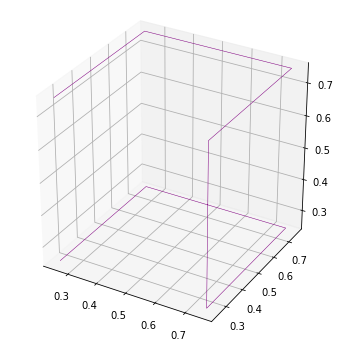

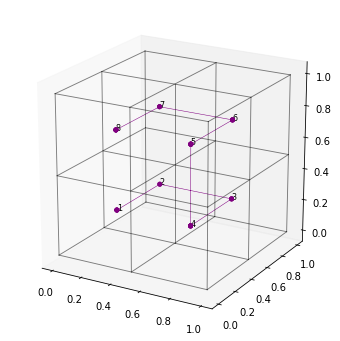

In [28]:
hilbert.plot_mainstream_hilbert(1)
hilbert.plot_mainstream_hilbert_cubes(1)